In [1]:
# using numpy 
import numpy as npy 

# using matplotlib 
import matplotlib.image as img 

# using statistics to import mean 
# for mean calculation 
from statistics import mean 

m = img.imread("cat.jpg") 
print(m)

# determining width and height of original image 
w, h = m.shape[:2] 

# new Image dimension with 4 attribute in each pixel 
newImage = npy.zeros([w, h, 4]) 
print(w) 
print(h) 
print(m.shape)


for i in range(w): 
    for j in range(h): 
        # ratio of RGB will be between 0 and 1 
        lst = [float(m[i][j][0]), float(m[i][j][1]), float(m[i][j][2])] 
        avg = int(mean(lst)) 
        
        newImage[i][j][0] = avg/255 
        newImage[i][j][1] = avg/255 
        newImage[i][j][2] = avg/255 
        newImage[i][j][3] = 1 # alpha value to be 1 

# Save image using imsave 
img.imsave('grayedImage.jpg', newImage)

[[[ 92  93  56]
  [ 92  93  56]
  [ 92  93  56]
  ...
  [ 40  42  25]
  [ 40  42  25]
  [ 40  42  25]]

 [[ 92  93  56]
  [ 92  93  56]
  [ 92  93  56]
  ...
  [ 40  42  25]
  [ 40  42  25]
  [ 40  42  25]]

 [[ 92  93  56]
  [ 92  93  56]
  [ 92  93  56]
  ...
  [ 40  42  25]
  [ 40  42  25]
  [ 40  42  25]]

 ...

 [[ 44  53  54]
  [ 45  54  55]
  [ 45  54  55]
  ...
  [ 92 110  31]
  [ 92 110  29]
  [ 92 110  29]]

 [[ 43  51  53]
  [ 44  53  54]
  [ 43  51  53]
  ...
  [ 92 110  29]
  [ 92 110  29]
  [ 92 110  27]]

 [[ 40  49  51]
  [ 41  50  52]
  [ 41  50  52]
  ...
  [ 92 110  29]
  [ 92 110  27]
  [ 92 110  27]]]
1280
960
(1280, 960, 3)


## Using Library - OpenCV

#### Sampling and Quantization

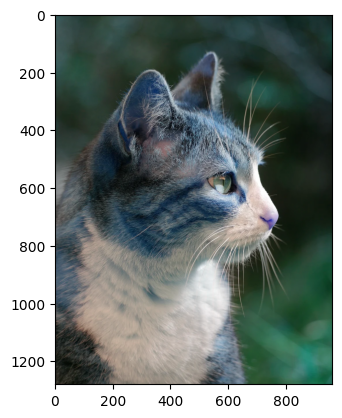

In [2]:
# import opencv
import cv2

# for displaying images
import matplotlib.pyplot as plt

# read image and display
im = cv2.imread('cat.jpg')
plt.imshow(im)
plt.show()

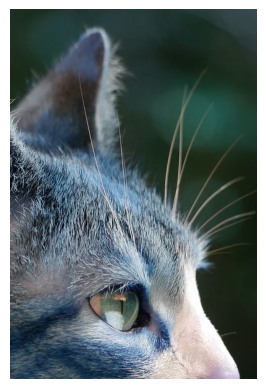

In [23]:
# showing only part of the image spatial position: (x, y)
im_eye = im[100:700, 400:800]
plt.axis("off")
plt.imshow(im_eye)
plt.show()

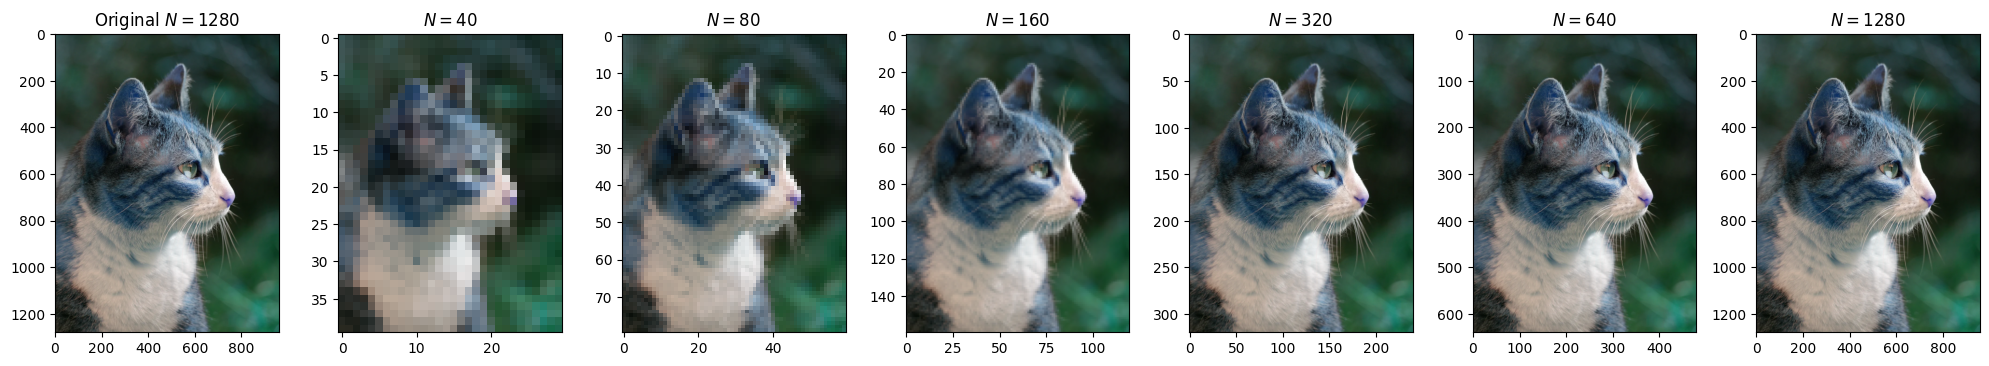

In [33]:
import cv2
from skimage.transform import downscale_local_mean
# for displaying images
import matplotlib.pyplot as plt
import numpy as np

def downsample_image(image_path, factor=2):
    """Takes in the image path and the downsample factor to return 5 
    downsampled images together with the original image.
    """
    # Load the original image
    img = cv2.imread(image_path)

    # Sample the image by a factor 
    factors = factor**np.arange(0, 6)

    # Create a subplot for each sampled image
    fig, ax = plt.subplots(1, len(factors)+1, figsize=(20, 10))

    # Display the original image
    ax[0].imshow(img)
    ax[0].set_title(r'Original $N=%d$' % img.shape[0])

    # Loop over each sampling factor and sample the image
    for i, factor in enumerate(factors):
        # Sample the image using the current factor
        image = downscale_local_mean(img, 
                                     factors=(factor, 
                                              factor, 
                                              1)).astype(int)

        # Determine the axis number for this subplot
        ax_num = len(factors) - i

        # Display the sampled image on the corresponding subplot
        ax[ax_num].imshow(image)

        # Set the subplot title to the size of the sampled image
        ax[ax_num].set_title(r'$N=%d$' % image.shape[0])

    # Adjust the layout of the subplots to prevent overlap
    plt.tight_layout()
    # Show the final plot
    plt.show()

    

# Downsample an image
downsample_image('cat.jpg')

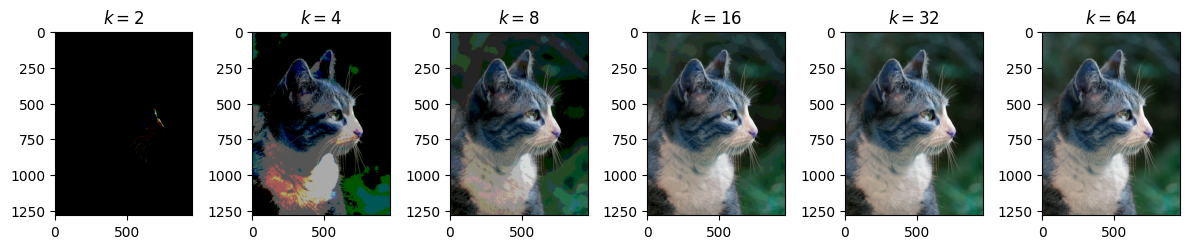

In [34]:
# quantize the image

def quantize_image(image_path, k_values):
    """
    Perform quantization on an image using different values of k.

    Parameters:
        image_path (str): The path to the image file.
        k_values (list): A list of k values to be used for quantization.
    """
    # Load the original image
    img = cv2.imread(image_path)

    # Create subplots for different k values
    fig, ax = plt.subplots(1, len(k_values), figsize=(12, 4))

    for i, k in enumerate(k_values):
        # Create k bins of equal width between 0 and the maximum intensity value
        bins = np.linspace(0, img.max(), k)

        # Map the pixel values of the original image to the nearest bin
        quantized_image = np.digitize(img, bins)

        # Convert the binned values back to the original range of intensity values
        reconstructed_image = (np.vectorize(bins
                                            .tolist()
                                            .__getitem__)(quantized_image-1)
                                 .astype(int))

        # Display the quantized image with title showing the number of bins (k)
        ax[i].imshow(reconstructed_image)
        ax[i].set_title(r'$k = %d$' % k)

    # Adjust the layout of the subplots to prevent overlap
    plt.tight_layout()

    # Show the final plot
    plt.show()

# Quantize the image
k_values = [ 2,  4,  8, 16, 32, 64]
quantize_image('cat.jpg', k_values)

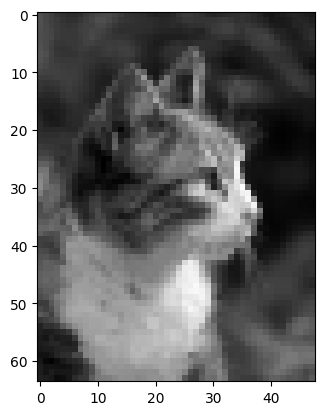

In [58]:
# downsampl

# using numpy 
import numpy as np

# using matplotlib 
import matplotlib.image as img 

img = cv2.imread("cat.jpg", cv2.IMREAD_GRAYSCALE)


image_downscaled1 = downscale_local_mean(img, (20, 20))


plt.imshow(image_downscaled1, cmap='gray')
plt.show()

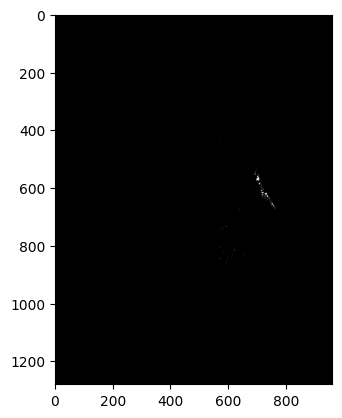

In [64]:
# using numpy 
import numpy as np

# using matplotlib 
import matplotlib.image as img 

im = cv2.imread("cat.jpg", cv2.IMREAD_GRAYSCALE)


# 32bit quantization
bins = np.linspace(0, im.max(), 2**5)
q32 = np.digitize(im, bins)
q32 = (np.vectorize(bins.tolist().__getitem__)(q32-1).astype(int))

# 8bit quantization
bins = np.linspace(0, im.max(), 2**3)
q8 = np.digitize(im, bins)
q8 = (np.vectorize(bins.tolist().__getitem__)(q8-1).astype(int))

# 4bit quantization
bins = np.linspace(0, im.max(), 2**2)
q4 = np.digitize(im, bins)
q4 = (np.vectorize(bins.tolist().__getitem__)(q4-1).astype(int))

# 4bit quantization
bins = np.linspace(0, im.max(), 2**1)
q2 = np.digitize(im, bins)
q2 = (np.vectorize(bins.tolist().__getitem__)(q2-1).astype(int))

plt.imshow(q2, cmap='gray')
plt.show()